# Trabalho No. 2

- Aluno: Guilherme Lisboa de Oliveira (GRR20170414)

```{admonition} Questões

Capítulo III. Modelos ARIMA

Seção III.10: 10, 18, 20, 31, 32, 35, 36

```

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Exercício 10

Seja $X_t$ um processo que represente a série de mortalidade cardiovascular **cmort** discutida no Exemplo II.2.

(a) Ajuste um modelo **AR(2)** à $X_t$ usando regressão linear como no Exemplo III.18.

(b) Assumindo que o modelo ajustado em (a) seja o modelo verdadeiro, encontre as previsões ao longo de um horizonte de quatro semanas, $X^n_{n+m}$ para $m=1,2,3,4$ e os intervalos de previsão de 95% correspondentes.


In [2]:
import pandas as pd
import numpy as np


cmort = pd.read_csv('./dados/cmort.csv', parse_dates=True, index_col='index')
cmort.index = pd.DatetimeIndex(cmort.index).to_period('W')

In [3]:
from statsmodels.tsa.ar_model import AutoReg, AutoRegResults

ajuste_ar_cmort: AutoRegResults = AutoReg(cmort, lags=2, old_names=True).fit()

ajuste_ar_cmort.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  cmort   No. Observations:                  508
Model:                     AutoReg(2)   Log Likelihood               -1597.312
Method:               Conditional MLE   S.D. of innovations              5.685
Date:                Sun, 19 Feb 2023   AIC                           3202.624
Time:                        20:24:07   BIC                           3219.530
Sample:                    01-18-1970   HQIC                          3209.254
                         - 10-07-1979                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.4506      2.394      4.784      0.000       6.759      16.142
cmort.L1       0.4286      0.040     10.770      0.000       0.351       0.507
cmort.L2       0.4418      0.040     11.111      0.000       0.364       0.520
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0957           +0.0000j            1.0957            0.0000
AR.2           -2.0658           +0.0000j            2.0658            0.5000
-----------------------------------------------------------------------------
"""

Previsões para as próximas 4 semanas:

In [4]:
ultima_semana = len(cmort)
previsao_ar = ajuste_ar_cmort.get_prediction(start=ultima_semana, end=ultima_semana + 4).summary_frame()

previsao_ar

,mean,mean_se,mean_ci_lower,mean_ci_upper
1979-09-24/1979-09-30,87.599864,5.684848,76.457767,98.741961
1979-10-01/1979-10-07,86.763490,6.184973,74.641165,98.885814
1979-10-08/1979-10-14,87.337139,7.134227,73.354310,101.319967
1979-10-15/1979-10-21,87.213500,7.593357,72.330793,102.096206
1979-10-22/1979-10-28,87.413940,8.054210,71.627979,103.199901


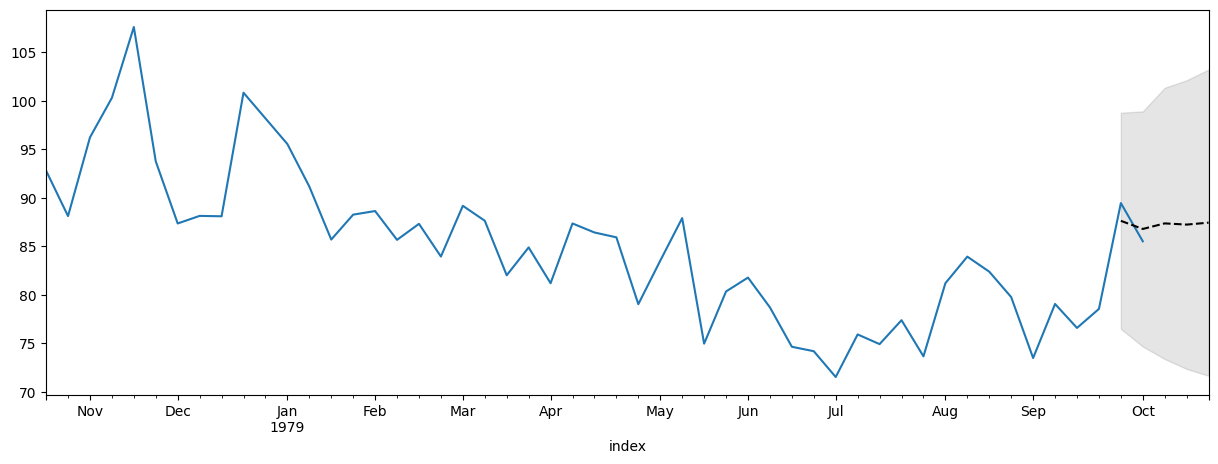

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 5))

cmort['cmort'].tail(50).plot(ax=ax);
previsao_ar['mean'].plot(ax=ax, style='k--');

ax.fill_between(previsao_ar.index, previsao_ar.mean_ci_lower, previsao_ar.mean_ci_upper, color='k', alpha=0.1);


## Exercício 18

Ajustar um modelo **AR(2)** para a série de mortalidade cardiovascular cmort discutida no Exemplo II.2. usando regressão linear e usando Yule-Walker.

(a) Compare as estimativas dos parâmetros obtidos pelos dois métodos.

(b) Compare os erros padrão estimados das estimativas dos coeficientes obtidos por regressão linear com suas aproximações assintóticas correspondentes, como dado no Teorema III.10.


In [6]:
from statsmodels.regression.linear_model import yule_walker

coeficientes, desvio_padrão = yule_walker(cmort, order=2)

print(f"Yule Walker")
print(f"Coeficientes: {coeficientes}, desvio padrão: {desvio_padrão}")

Yule Walker
Coeficientes: [0.43147813 0.44187887], desvio padrão: 5.68375799874225


In [7]:
print(f"AR(2):")
print(f"Coeficientes: {ajuste_ar_cmort.params}, desvio padrão: {np.sqrt(ajuste_ar_cmort.sigma2)}")

AR(2):
Coeficientes: intercept    11.450613
cmort.L1      0.428591
cmort.L2      0.441787
dtype: float64, desvio padrão: 5.684847835121764


## Exercício 20

Repita o seguinte exercício numérico três vezes. Gere $n=500$ observações do modelo ARMA dado por $X_t=0.9X_{t−1} + W_t − 0.9W_{t−1}$, com $W_t \sim N(0,1)$ independentes. Plote os dados simulados, calcule o ACF e o PACF amostrais dos dados simulados e ajuste um modelo **ARMA(1,1)** aos dados. O que aconteceu e como você explica os resultados?

In [ ]:
from statsmodels.tsa.api import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
sns.set_theme(style="darkgrid")

arparams = np.array([0.9])
maparams = np.array([-0.9])
ar = np.r_[1, -arparams]
ma = np.r_[1, maparams]

ex20_dados = arma_generate_sample(ar, ma, nsample=500)

sns.lineplot(data=ex20_dados);

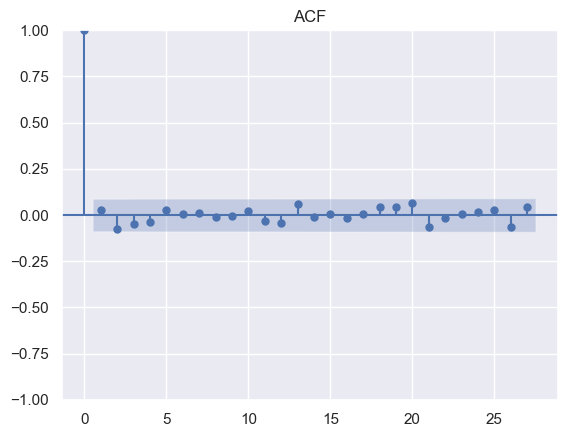

In [ ]:
import statsmodels.graphics.tsaplots as sm_tsa_plots

sm_tsa_plots.plot_acf(ex20_dados, title="ACF");

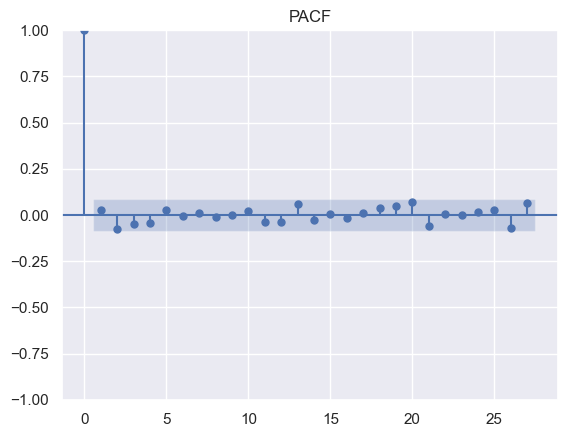

In [ ]:
sm_tsa_plots.plot_pacf(ex20_dados, title="PACF");

In [ ]:
ajuste = ARIMA(ex20_dados, order=(1, 0, 1)).fit()
ajuste.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -713.472
Date:                Sun, 19 Feb 2023   AIC                           1434.944
Time:                        20:23:22   BIC                           1451.802
Sample:                             0   HQIC                          1441.559
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0262      0.046     -0.565      0.572      -0.117       0.065
ar.L1         -0.7880      0.271     -2.908      0.004      -1.319      -0.257
ma.L1          0.8239      0.249      3.302      0.001       0.335       1.313
sigma2         1.0161      0.071     14.405      0.000       0.878       1.154
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.66
Prob(Q):                              0.93   Prob(JB):                         0.26
Heteroskedasticity (H):               1.00   Skew:                             0.10
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Como $X_t - 0.9 X_{t-1} = W_t - 0.9 W_{t-1}$, temos que $X_t = W_t$. O modelo encontra valores de $\phi_1 = - \theta_1$, porém com erro padrão muito alto, fazendo que não sejam estatísticamente significativos. Isso devido a relação entre os coeficientes que impossibilita o modelo de identificar o valor correto do parâmetro. Nota-se também nos gráficos do ACF e PACF que o lag=1 não é significativo.

## Exercício 31

No Exemplo III.40, apresentamos os diagnósticos para o MA(2) ajustado à série de taxas de crescimento do PIB. Usando esse exemplo como guia, conclua o diagnóstico para o ajuste do AR(1).

In [ ]:
gnp = pd.read_csv('./dados/gnp.csv', parse_dates=True, index_col='index')
gnp.index = pd.DatetimeIndex(gnp.index)

ex31_ajuste: AutoRegResults = AutoReg(gnp, 1).fit()

ex31_ajuste.summary()

c:\DEV\Guilherme\estatisticaufpr\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  value   No. Observations:                  223
Model:                     AutoReg(1)   Log Likelihood               -1132.936
Method:               Conditional MLE   S.D. of innovations             39.820
Date:                Sun, 19 Feb 2023   AIC                           2271.872
Time:                        20:23:22   BIC                           2282.080
Sample:                    04-01-1947   HQIC                          2275.994
                         - 07-01-2002                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8741      5.972      1.319      0.187      -3.830      19.579
value.L1       1.0062      0.001    857.334      0.000       1.004       1.008
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9939           +0.0000j            0.9939            0.0000
-----------------------------------------------------------------------------
"""

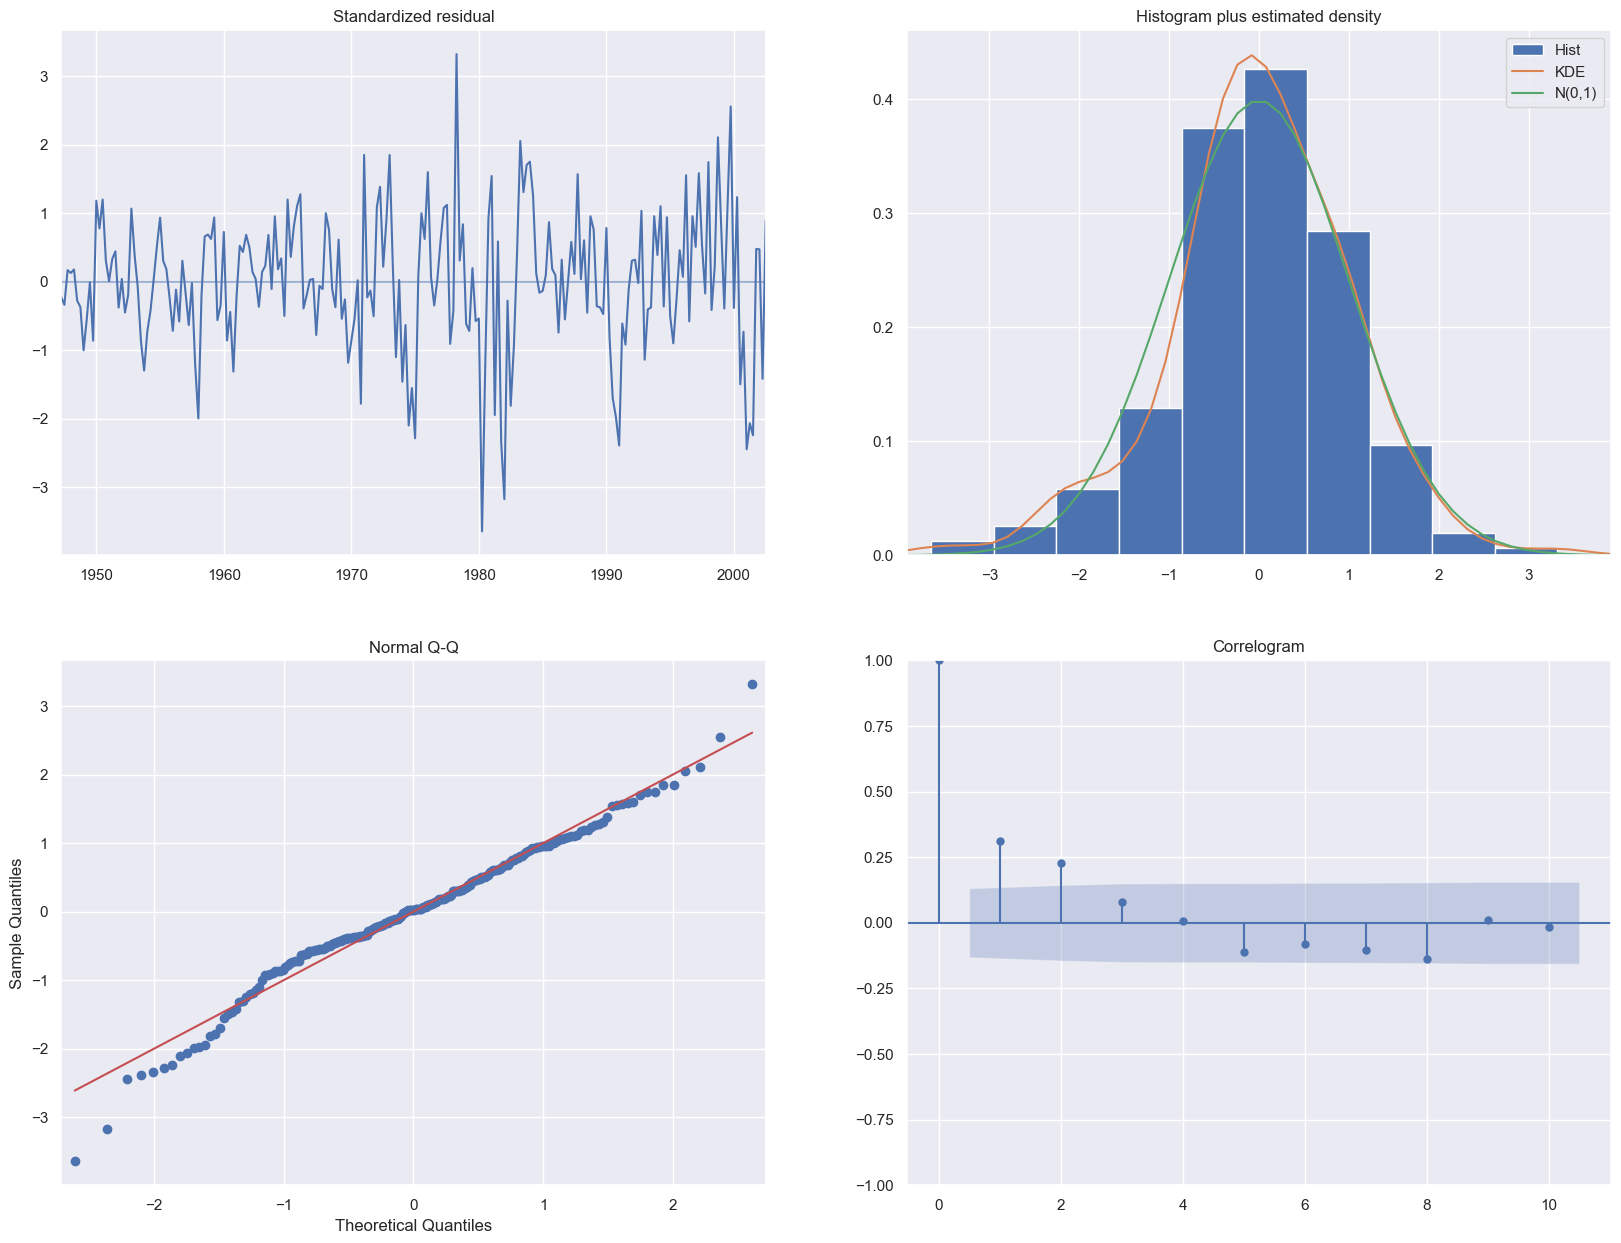

In [ ]:
ex31_ajuste.plot_diagnostics(figsize=(20,15));

In [ ]:
print(ex31_ajuste.diagnostic_summary())

       Test of No Serial Correlation       
       Lag  Ljung-Box LB P-value         DF
-------------------------------------------
         1     34.906      0.000          1
         2     34.919      0.000          2
         3     37.674      0.000          3
         4     39.233      0.000          4
         5     41.809      0.000          5
         6     46.204      0.000          6
         7     46.229      0.000          7
         8     46.292      0.000          8


             Test of Normality              
Jarque-Bera    P-value   Skewness   Kurtosis
--------------------------------------------
     16.561      0.000     -0.353      4.137


    Test of Conditional Homoskedasticity   
       Lag    ARCH-LM    P-value         DF
-------------------------------------------
         1      3.830      0.050          1
         2      5.675      0.059          2
         3      7.769      0.051          3
         4      9.113      0.058          4
         5      8.933   

Os gráficos e testes indicam que os resíduos seguem um padrão normalizado (p-valor Jarque-Bera próximo de 0). Entretanto, o teste de correlção Ljung-Box mostra que os resíduos são correlacionados. Isso também é notável no gráfico de correlação, onde os valores extrapolam valores de referência da área azul claro.

## Exercício 32

Os preços do petróleo bruto em dólares por barril são guardados em **oil**. Ajuste um modelo **ARIMA(p,d,q)** para a taxa de crescimento realizando todos os diagnósticos necessários. Comente.

In [ ]:
oil = pd.read_csv('./dados/oil.csv', parse_dates=True, index_col='index')
oil.index = pd.DatetimeIndex(oil.index).to_period('W')

ex32_ajuste = ARIMA(oil, order=([1, 3, 5, 8],1,0)).fit()

ex32_ajuste.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:                         value   No. Observations:                  545
Model:             ARIMA([1, 3, 5, 8], 1, 0)   Log Likelihood               -1268.428
Date:                       Sun, 19 Feb 2023   AIC                           2546.855
Time:                               20:23:24   BIC                           2568.350
Sample:                           01-02-2000   HQIC                          2555.259
                                - 06-20-2010                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1644      0.025      6.449      0.000       0.114       0.214
ar.L3          0.0843      0.025      3.322      0.001       0.035       0.134
ar.L5          0.0475      0.035      1.340      0.180      -0.022       0.117
ar.L8          0.1761      0.029      5.992      0.000       0.118       0.234
sigma2         6.2018      0.229     27.113      0.000       5.753       6.650
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               981.42
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               7.34   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

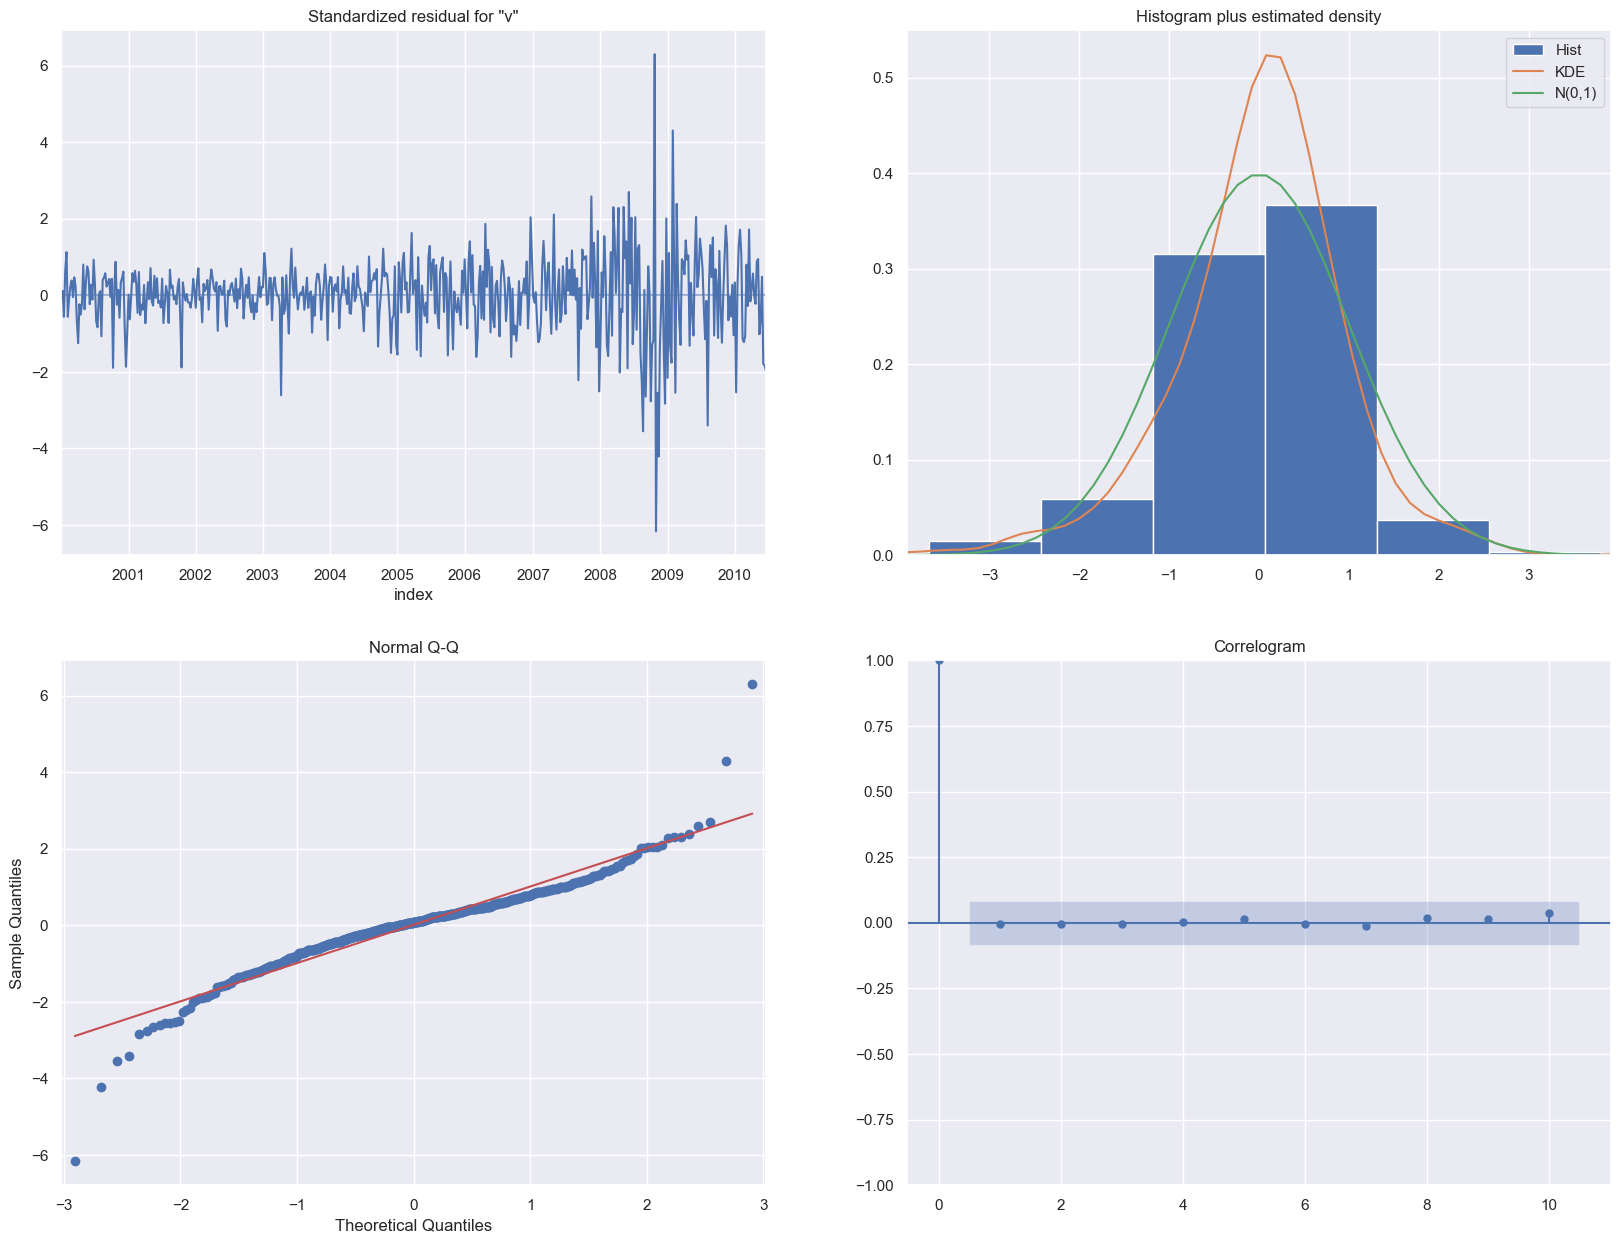

In [ ]:
ex32_ajuste.plot_diagnostics(figsize=(20,15));

Os gráficos de diagnóstico mostram que o modelo é bem ajustado, entretanto os resíduos apresentam desvios significativos nas extremidades do gráfico QQ. Estas observações se devem a crise financeira de 2008 onde o barril de petróleo sofreu grande variação como é possível observar no gráfico dos resíduos normalizados.

## Exercício 35

Consideremos que $S_t$ representa os dados de vendas mensais em **sales**, $n=150$ e seja $L_t$ o principal indicador em **lead**.

(a) Ajustar um modelo ARIMA para $S_t$, os dados de vendas mensais. Discuta seu modelo passo-a-passo, apresentando seu (A) exame inicial dos dados, (B) transformações, se necessário, (C) identificação inicial das ordens de dependência e grau de diferenciação, (D) estimativas dos parâmetros, (E) diagnósticos dos resíduos e escolha do modelo.

(b) Use os gráficos CCF e lag entre $∇S_t$ e $∇L_t$ para argumentar que uma regressão de $∇S_t$ em $∇L_t$ é razoável. Observe que, em lag2.plot(), a primeira série nomeada é aquela que fica defasada.

(c) Ajuste o modelo de regressão $∇S_t=β_0+β_1∇L_{t−3}+X_t$, onde $X_t$ é um processo ARMA. Explique como você decidiu o seu modelo para $X_t$. Discuta seus resultados. Veja o Exemplo III.45 para ajudar na codificação deste problema.

Inicialmente, ajustamos os dados para que as linhas fiquem sobrepostas para auxiliar na visualização da relação entre sales e leads.

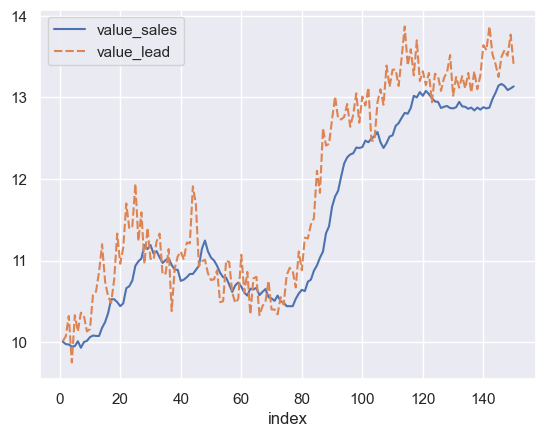

In [ ]:
sales = pd.read_csv('./dados/sales.csv', index_col='index')
lead = pd.read_csv('./dados/lead.csv', index_col='index')

ex35_dados = sales.merge(lead, on='index', suffixes=('_sales', '_lead'))

ex35_dados.value_sales = ex35_dados.value_sales / 20

sns.lineplot(data=ex35_dados);

Ajustando os modelos em função do AIC e avaliando resíduos buscando normalização e baixa correlação, chegamos no seguinte modelo que parece adequado:

In [ ]:
ex35_modelo = ARIMA(ex35_dados.value_sales, ex35_dados.value_lead, order=([1, 3],1,1)).fit()

ex35_modelo.summary()

c:\DEV\Guilherme\estatisticaufpr\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\DEV\Guilherme\estatisticaufpr\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\DEV\Guilherme\estatisticaufpr\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:             value_sales   No. Observations:                  150
Model:             ARIMA([1, 3], 1, 1)   Log Likelihood                 193.692
Date:                 Sun, 19 Feb 2023   AIC                           -377.385
Time:                         20:23:26   BIC                           -362.365
Sample:                              0   HQIC                          -371.282
                                 - 150                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
value_lead    -0.0500      0.016     -3.056      0.002      -0.082      -0.018
ar.L1          0.4295      0.165      2.605      0.009       0.106       0.753
ar.L3          0.3184      0.083      3.840      0.000       0.156       0.481
ma.L1         -0.2008      0.209     -0.960      0.337      -0.611       0.209
sigma2         0.0043      0.000      9.619      0.000       0.003       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.00
Prob(Q):                              0.99   Prob(JB):                         0.37
Heteroskedasticity (H):               0.44   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

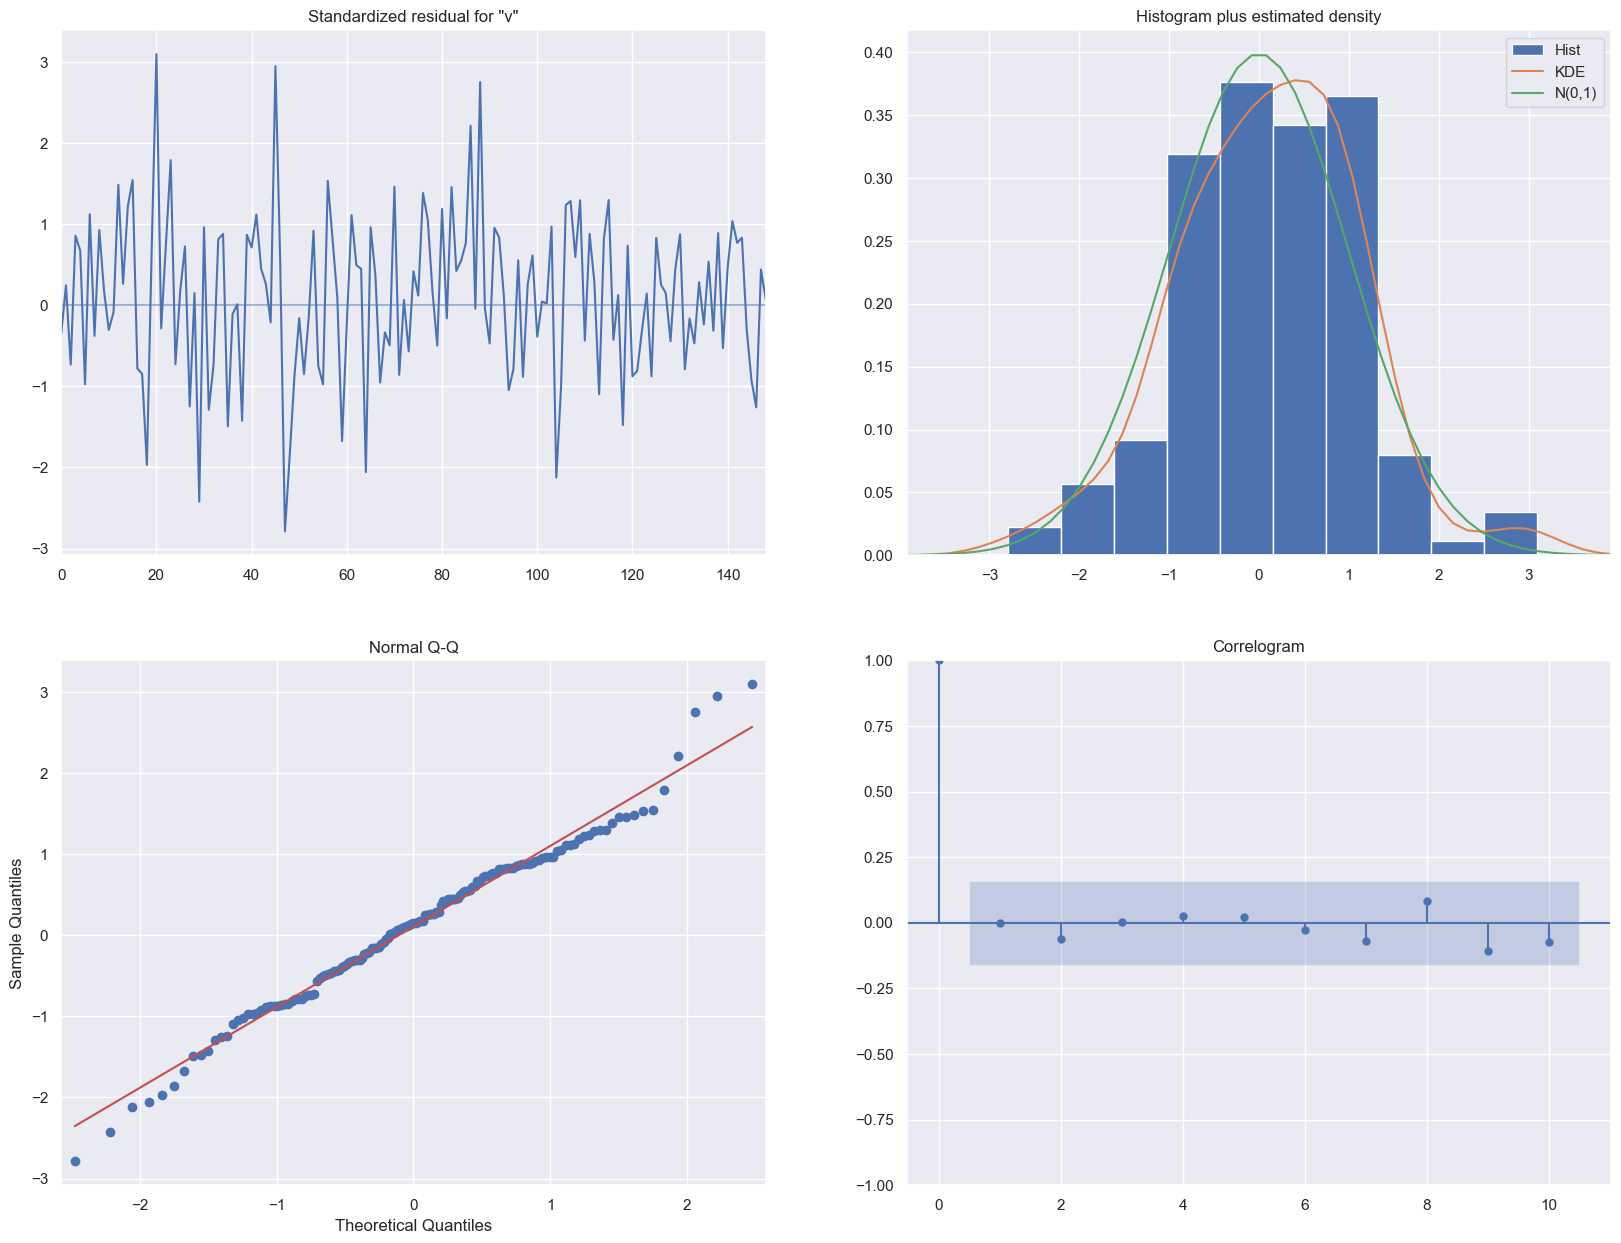

In [ ]:
ex35_modelo.plot_diagnostics(figsize=(20,15));

Código abaixo para plotar CCF:

In [ ]:
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_ccf(x, y, lag_range,
             figsize=(12, 5),
             title_fontsize=15, xlabel_fontsize=16, ylabel_fontsize=16):
    """
    plot cross-correlation between series x and y
    :param x: series that we leads y on the left
    :type x: pd.Series
    :param y: series that we leads x on the right
    :type y: pd.Series
    :param lag_range: range of lag
    :type lag_range: int
    :param figsize: figure size
    :type figsize: tuple
    :param title_fontsize: title font size
    :type title_fontsize: int
    :param xlabel_fontsize: x axis label size
    :type xlabel_fontsize: int
    :param ylabel_fontsize: y axis label size
    :type ylabel_fontsize: int
    """

    title = "{} & {}".format(x.name, y.name)
    lags = range(-lag_range, lag_range )
    left = ccf(y, x)[:lag_range + 1]
    right = ccf(x, y)[:lag_range]

    left = left[1:][::-1]
    cc = np.concatenate([left, right])

    sigma = 1 / np.sqrt(x.shape[0])
    fig, ax = plt.subplots(figsize=figsize)
    ax.vlines(lags, [0], cc)
    plt.plot(lags, [0] * len(lags), c="black", linewidth=1.0)
    plt.plot(lags, [2 * sigma] * len(lags), '-.', c="blue", linewidth=0.6)
    plt.plot(lags, [-2 * sigma] * len(lags), '-.', c="blue", linewidth=0.6)
    ax.set_xlabel('Lag', fontsize=xlabel_fontsize)
    ax.set_ylabel('cross-correlation', fontsize=ylabel_fontsize)    
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    fig.suptitle(title, fontsize=title_fontsize, fontweight='bold', y=0.93)

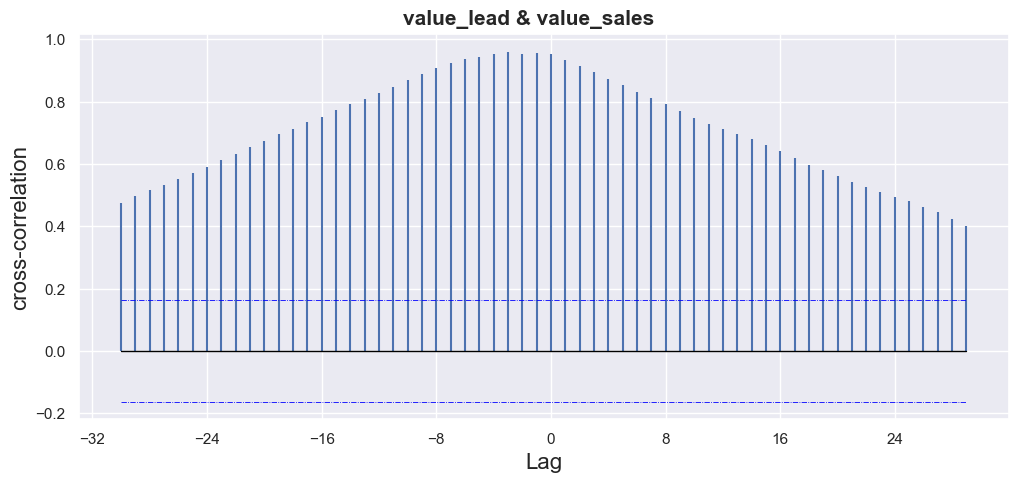

In [ ]:
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt

plot_ccf(ex35_dados.value_lead, ex35_dados.value_sales, 30)

Notamos que o ponto mais alto está em um atraso de t-3. Assim, empurramos os 3 primeiros valores de leads para frente para alinhar os índices e refazemos o modelo com alguns ajustes:

In [ ]:
vendas = ex35_dados.value_sales.copy()

# Empurra os valores dos leads 3 tempos para frente e preenche os vazios com o valores do primeiro válido (10.1)
leads = ex35_dados.value_lead.shift(3).fillna(method="backfill").copy()

ex35_modelo_delta = ARIMA(vendas, exog=leads, order=([2,3,4],0,2)).fit()

ex35_modelo_delta.summary()

c:\DEV\Guilherme\estatisticaufpr\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\DEV\Guilherme\estatisticaufpr\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\DEV\Guilherme\estatisticaufpr\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\DEV\Guilherme\estatisticaufpr\venv\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                value_sales   No. Observations:                  150
Model:             ARIMA([2, 3, 4], 0, 2)   Log Likelihood                 269.686
Date:                    Sun, 19 Feb 2023   AIC                           -523.372
Time:                            20:23:28   BIC                           -499.287
Sample:                                 0   HQIC                          -513.587
                                    - 150                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9186      0.283     35.008      0.000       9.363      10.474
value_lead     0.1351      0.007     18.999      0.000       0.121       0.149
ar.L2          1.2977      0.085     15.241      0.000       1.131       1.465
ar.L3          0.3073      0.070      4.417      0.000       0.171       0.444
ar.L4         -0.6369      0.083     -7.636      0.000      -0.800      -0.473
ma.L1          1.7767      0.049     36.217      0.000       1.681       1.873
ma.L2          0.9425      0.042     22.201      0.000       0.859       1.026
sigma2         0.0015      0.000      8.329      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                 0.36
Prob(Q):                              0.49   Prob(JB):                         0.83
Heteroskedasticity (H):               0.67   Skew:                            -0.07
Prob(H) (two-sided):                  0.16   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

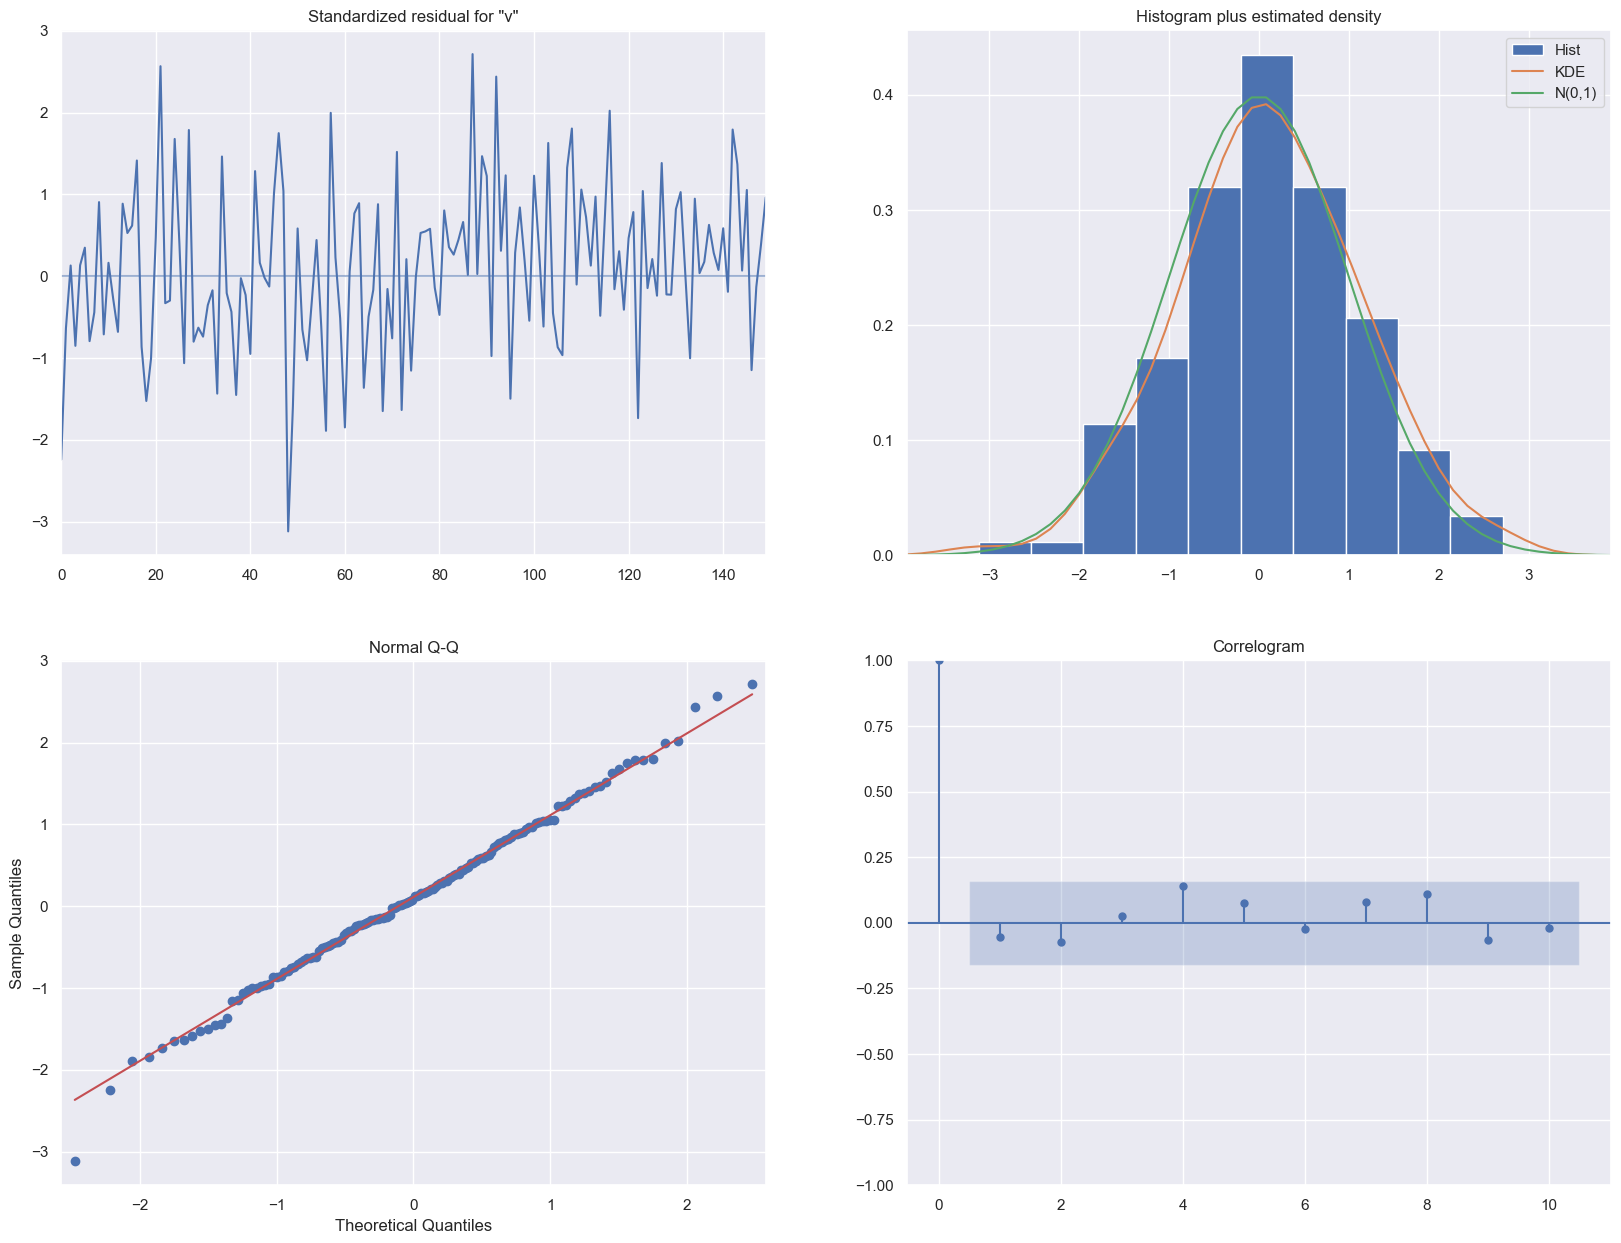

In [ ]:
ex35_modelo_delta.plot_diagnostics(figsize=(20,15));

## Exercício 36

Um dos notáveis desenvolvimentos tecnológicos na indústria de computadores tem sido a capacidade de armazenar informações densamente em um disco rígido. Além disso, o custo de armazenamento diminuiu constantemente, causando problemas de excesso de dados, em vez de big datas. O conjunto de dados para esta tarefa é o **cpg**, que consiste no preço mediano anual de varejo por GB de discos rígidos, digamos $C_t$, de uma amostra de fabricantes de 1980 a 2008.

(a) Mostre gráficamente $C_t$ e descreva o que você vê.

(b) Argumente que a curva $C_t$ versus $t$ se comporta como $C_t ≈ αe^{βt}$ ajustando uma regressão linear de $log(C_t)$ em t e então plotando a linha ajustada para compará-la aos dados registrados. Comente.

(c) Inspecione os resíduos do ajuste de regressão linear e comente.

(d) Ajuste a regressão novamente, mas agora usando o fato de que os erros são autocorrelacionados. Comente.

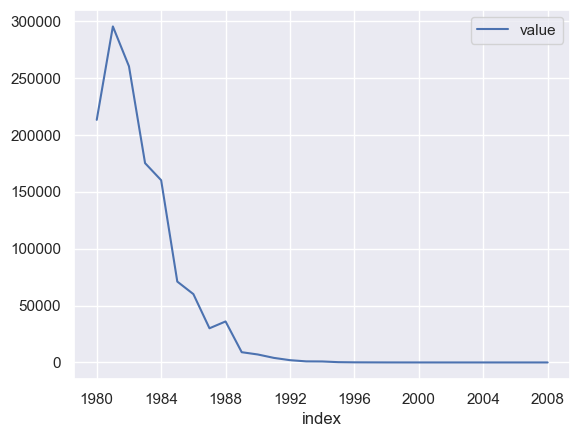

In [ ]:
cpg = pd.read_csv('./dados/cpg.csv', parse_dates=True, index_col='index')
#cpg.index = pd.DatetimeIndex(cpg.index).to_period('Y')

sns.lineplot(data=cpg);

In [ ]:
from statsmodels.formula.api import ols

cpg['indice_anos'] = range(1, len(cpg) + 1)

ex36_modelo_linear = ols('np.log(value) ~ indice_anos', data=cpg).fit()

ex36_modelo_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(value)   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1790.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           3.23e-26
Time:                        20:23:29   Log-Likelihood:                -26.396
No. Observations:                  29   AIC:                             56.79
Df Residuals:                      27   BIC:                             59.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      14.6257      0.238     61.570      0.000      14.138      15.113
indice_anos    -0.5851      0.014    -42.304      0.000      -0.613      -0.557
==============================================================================
Omnibus:                        4.198   Durbin-Watson:                   0.476
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                2.584
Skew:                          -0.628   Prob(JB):                        0.275
Kurtosis:                       3.749   Cond. No.                         35.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

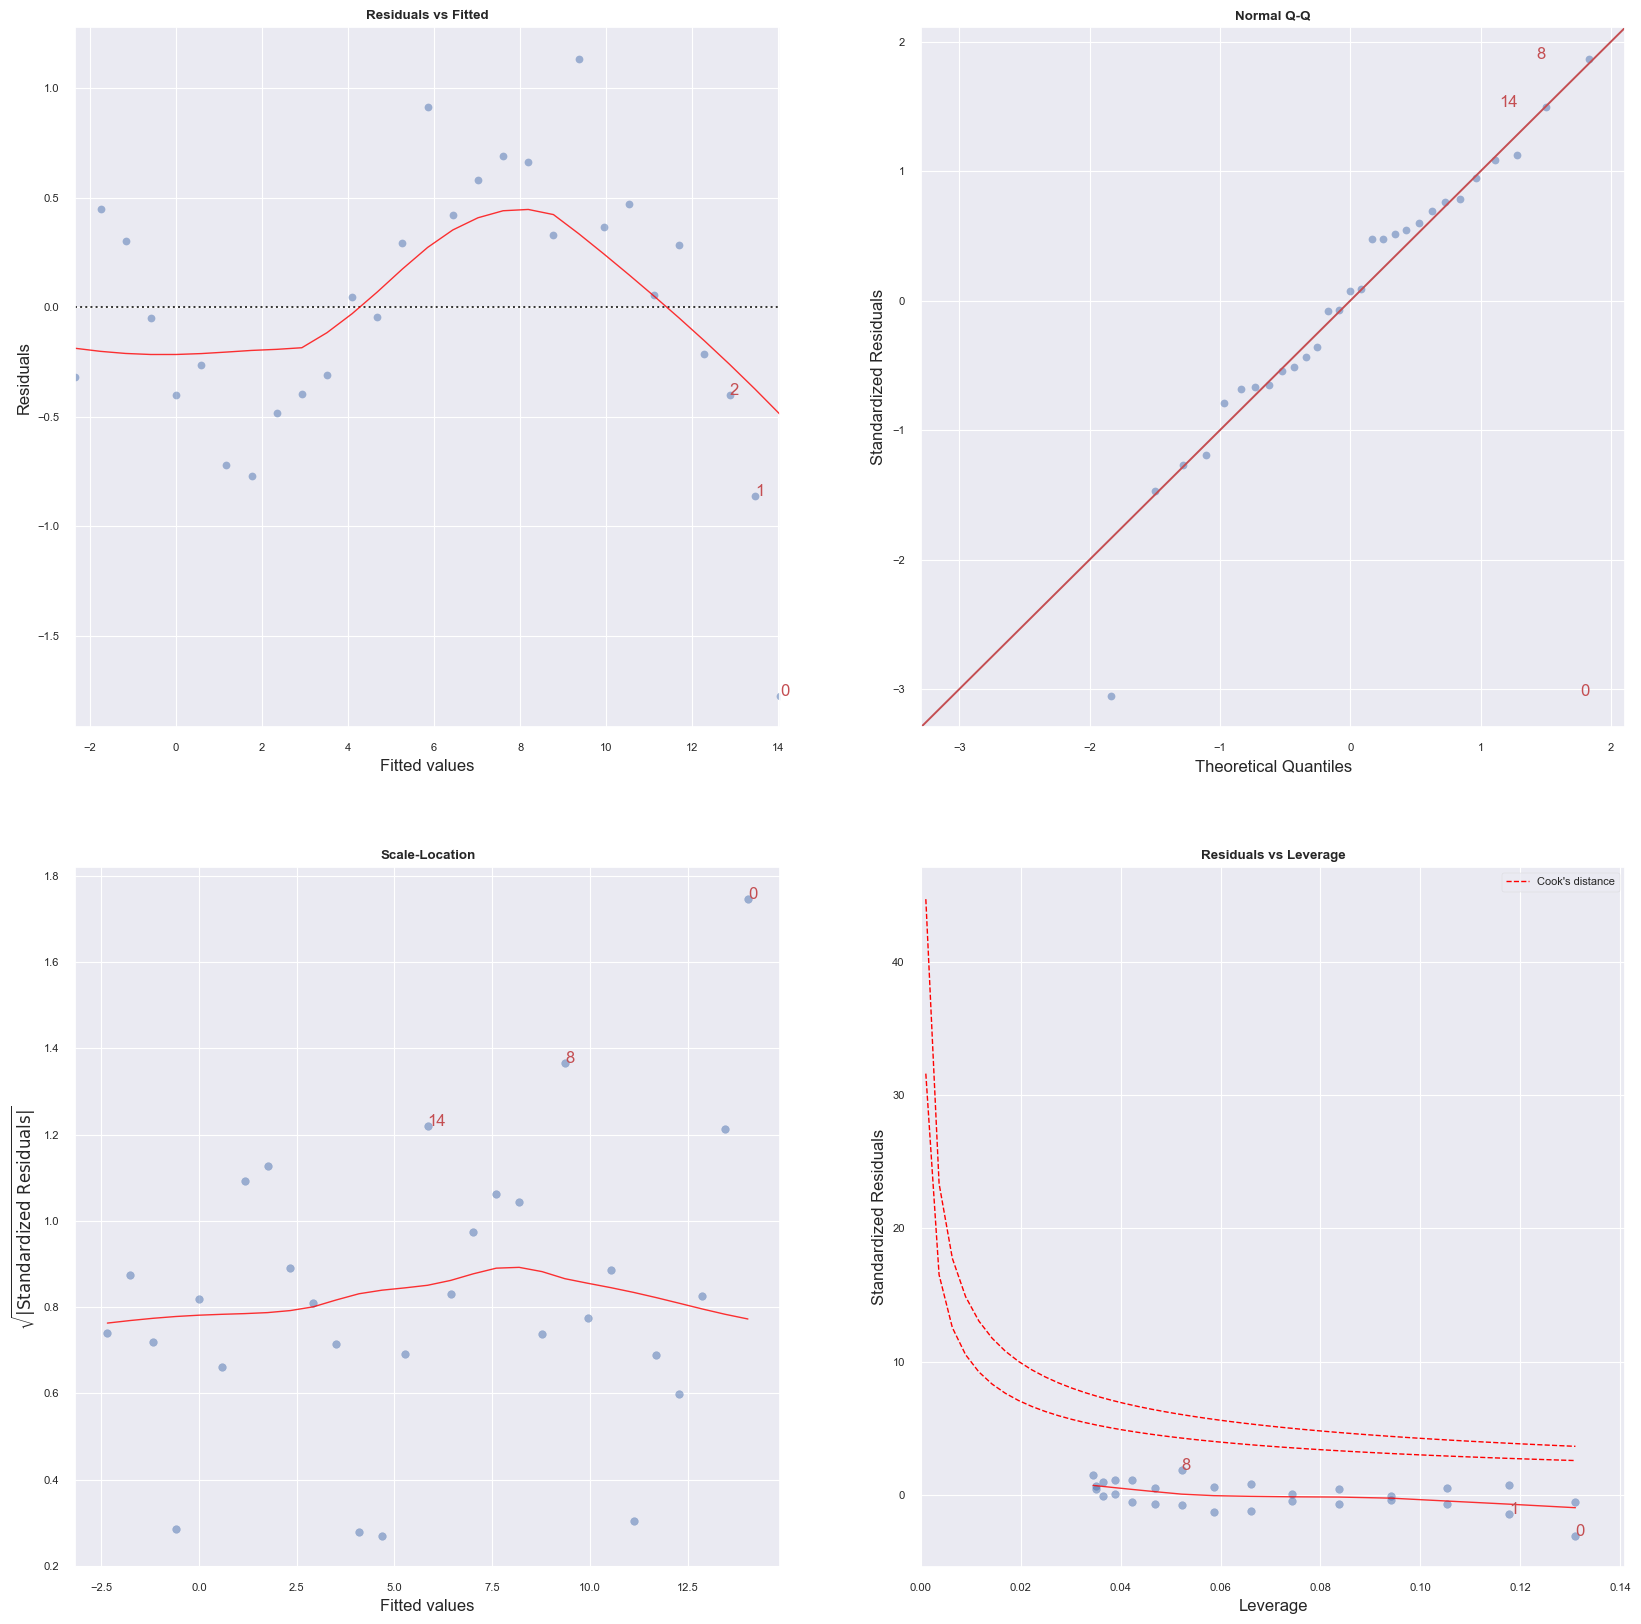

      Features  VIF Factor
1  indice_anos        1.00
0    Intercept        4.21


In [ ]:
from utils.regression_plots import Linear_Reg_Diagnostic

diagnostico = Linear_Reg_Diagnostic(ex36_modelo_linear)

diagnostico();

Analisando o gráfico de resíduos x valores ajustados notamos um padrão na disposição dos pontos (similar a uma senóide), indicando correlação.

In [ ]:
ex36_modelo_arima = ARIMA(np.log(cpg['value']), order=(2,1,1)).fit()

ex36_modelo_arima.summary()

c:\DEV\Guilherme\estatisticaufpr\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\DEV\Guilherme\estatisticaufpr\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\DEV\Guilherme\estatisticaufpr\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   29
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -15.322
Date:                Sun, 19 Feb 2023   AIC                             38.643
Time:                        20:23:31   BIC                             43.972
Sample:                    01-01-1980   HQIC                            40.272
                         - 01-01-2008                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5085      0.209      2.437      0.015       0.099       0.917
ar.L2          0.4619      0.195      2.372      0.018       0.080       0.844
ma.L1         -0.6376      0.273     -2.339      0.019      -1.172      -0.103
sigma2         0.1640      0.054      3.065      0.002       0.059       0.269
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.61   Prob(JB):                         0.71
Heteroskedasticity (H):               0.85   Skew:                            -0.38
Prob(H) (two-sided):                  0.81   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""